In [1]:
import pandas as pd
import nltk

#### importing dataset

In [2]:
dataset=pd.read_csv(r'C:\Users\guptaek\fliprobo_files\Email Spam detection\messages.csv')

In [3]:
dataset.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [4]:
dataset.shape

(2893, 3)

In [168]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
 3   length   2893 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 90.5+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

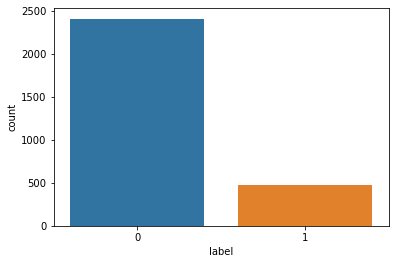

In [5]:
import seaborn as sb
sb.countplot(x='label',data=dataset)

In [6]:
dataset['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [7]:
print('{:.2f}% Non Spam mails'.format((dataset['label'].value_counts()[0]/2893)*100))
print('{:.2f}% Spam mails'.format((dataset['label'].value_counts()[1]/2893)*100))

83.37% Non Spam mails
16.63% Spam mails


## Data preprocessing

In [8]:
## making a new column just to take the lenght of string in mail messages
dataset['length']=dataset['message'].str.len()

In [9]:
dataset.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
1  lang classification grimes , joseph e . and ba...      0    1800  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046

In [10]:
##considering only the message column and removing subject
data=dataset.drop('subject',axis=1)

In [11]:
data.head()

message  label  length
0  content - length : 3386 apple-iss research cen...      0    2856
1  lang classification grimes , joseph e . and ba...      0    1800
2  i am posting this inquiry for sergei atamas ( ...      0    1435
3  a colleague and i are researching the differin...      0     324
4  earlier this morning i was on the phone with a...      0    1046

In [12]:
data['length'].sum()

9344743

In [13]:
## converting all messages to lower case
data['message']=data['message'].str.lower()

In [14]:
# Replace email addresses with 'email'
data['message'] = data['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
data['message'] = data['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
data['message'] = data['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['message'] = data['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
data['message'] = data['message'].str.replace(r'\d+(\.\d+)?', 'numbr')


In [15]:
# Remove punctuation
data['message'] = data['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
data['message'] = data['message'].str.replace(r'\s+', ' ')
# Remove leading and trailing whitespace
data['message'] = data['message'].str.replace(r'^\s+|\s+?$', '')

In [16]:
import string
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

data['message'] = data['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [17]:
data['cleaned_length']=data['message'].str.len()

In [18]:
data.head()

message  label  length  \
0  content length numbr apple iss research center...      0    2856   
1  lang classification grimes joseph e barbara f ...      0    1800   
2  posting inquiry sergei atamas satamas umabnet ...      0    1435   
3  colleague researching differing degrees risk p...      0     324   
4  earlier morning phone friend mine living south...      0    1046   

   cleaned_length  
0            2179  
1            1454  
2            1064  
3             210  
4             629

In [19]:
print('Length of mail message before cleaning text',data['length'].sum())
print('Length of mail message before cleaning text',data['cleaned_length'].sum())
print(data['length'].sum()-data['cleaned_length'].sum() ,'characters removed')

Length of mail message before cleaning text 9344743
Length of mail message before cleaning text 6767857
2576886 characters removed


Text(0.5, 0, 'Non spam message length')

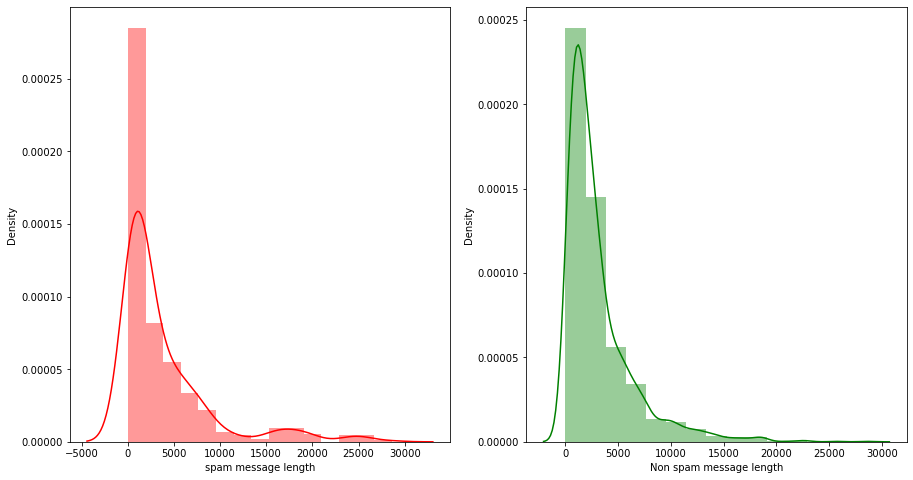

In [20]:
#Viewing distribution of message before cleaning
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
f,ax=plt.subplots(1,2,figsize=(15,8))
#plt.figure(figsize=(15,8))
sb.distplot(data[data['label']==1]['length'],ax=ax[0],bins=15,color='r')
ax[0].set_xlabel('spam message length')
sb.distplot(data[data['label']==0]['length'],ax=ax[1],bins=15,color='g')
ax[1].set_xlabel('Non spam message length')

Text(0.5, 0, 'Non spam message length')

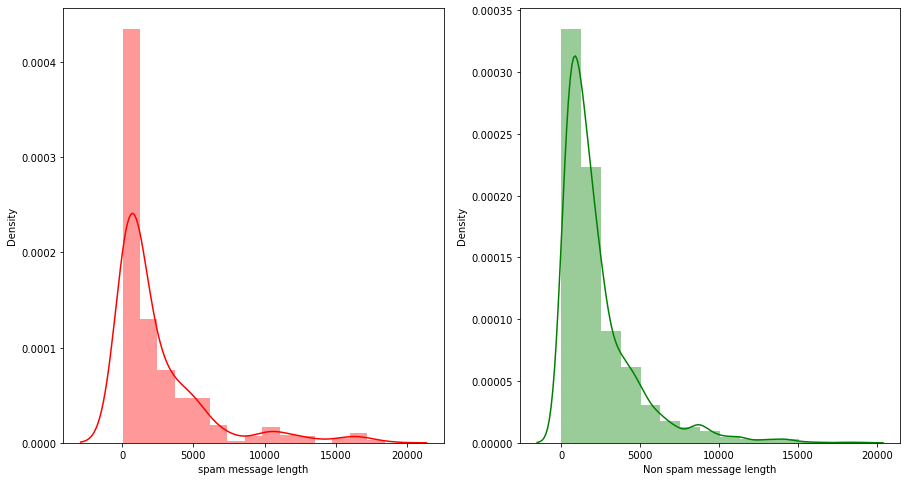

In [21]:
#Viewing distribution of message after cleaning text
f,ax=plt.subplots(1,2,figsize=(15,8))
sb.distplot(data[data['label']==1]['cleaned_length'],ax=ax[0],bins=15,color='r')
ax[0].set_xlabel('spam message length')
sb.distplot(data[data['label']==0]['cleaned_length'],ax=ax[1],bins=15,color='g')
ax[1].set_xlabel('Non spam message length')

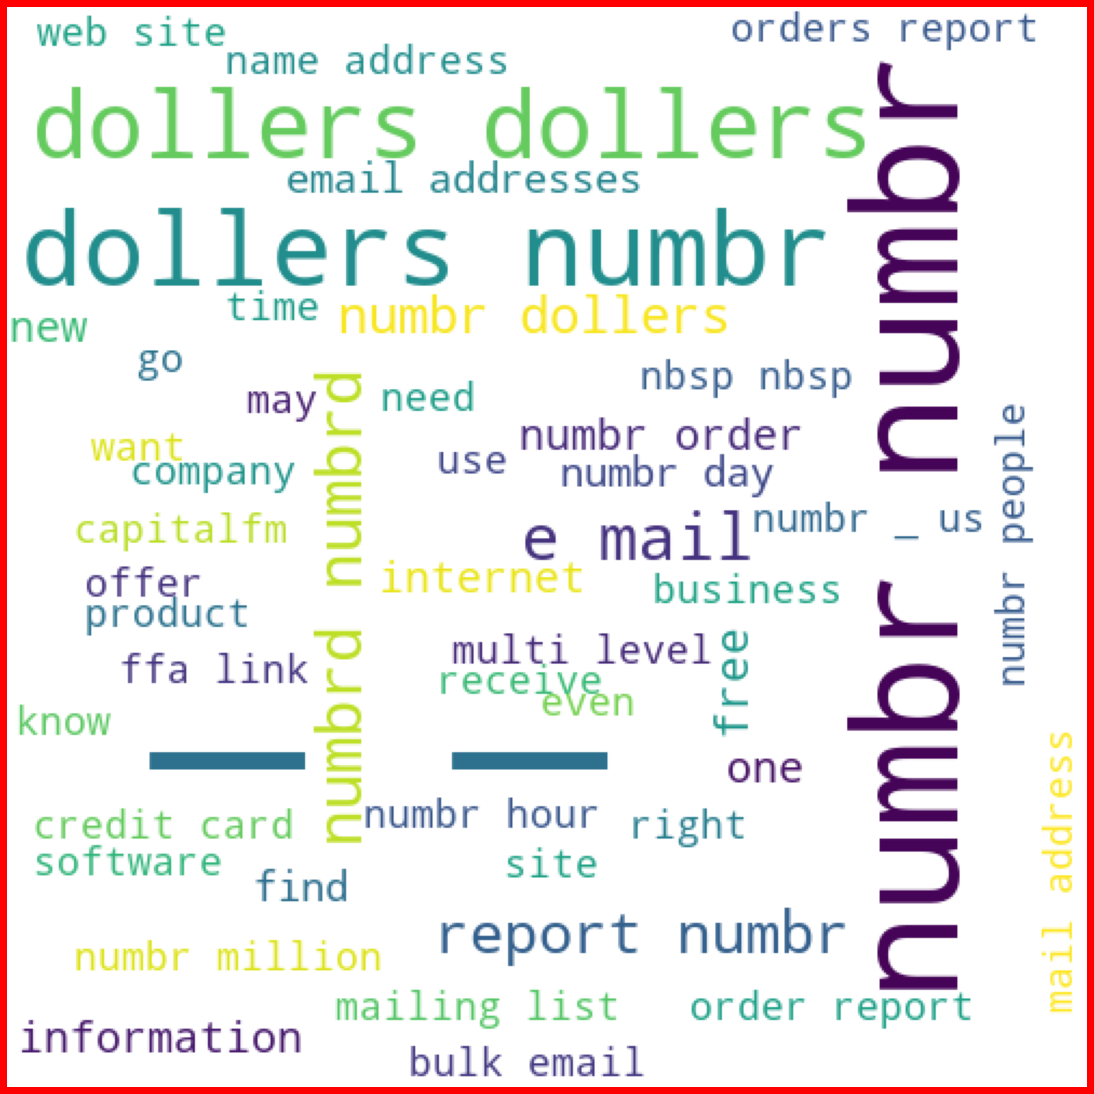

In [39]:
### Displaying word dictionary
from wordcloud import WordCloud
spams=data['message'][data['label']==1]
spam_cloud=WordCloud(width=500, height=500,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(15,15),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer()
tf_idf.fit(data['message'])
x=tf_idf.transform(data['message'])

In [169]:
x.shape

(2893, 54998)

## Model preparation

In [85]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve

In [59]:
y=data['label']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [133]:
models=[LogisticRegression(),DecisionTreeClassifier(),MultinomialNB(),SVC()]

In [135]:
def model_perf(model):
    f,ax=plt.subplots(1,2,figsize=(14,5))
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print(sb.heatmap(confusion_matrix(y_test,y_pred,labels=[1,0]),annot=True,ax=ax[0]))
    fpr,tpr,thresh=roc_curve(y_test,y_pred)
    roc_auc=auc(fpr,tpr)
    print('AUC_ROC score',roc_auc)
    ax[1].plot(fpr,tpr)
    ax[1].set_title('ROC_AUC curve')
    ax[1].set_xlabel('False positive rate')
    ax[1].set_ylabel('True positive rate')

############################ LogisticRegression() ######################
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       585
           1       0.99      0.73      0.84       139

    accuracy                           0.95       724
   macro avg       0.97      0.87      0.91       724
weighted avg       0.95      0.95      0.94       724

AxesSubplot(0.125,0.125;0.281818x0.755)
AUC_ROC score 0.866051773965443
############################ DecisionTreeClassifier() ######################
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       585
           1       0.93      0.82      0.87       139

    accuracy                           0.95       724
   macro avg       0.95      0.90      0.92       724
weighted avg       0.95      0.95      0.95       724

AxesSubplot(0.125,0.125;0.281818x0.755)
AUC_ROC score 0.9032343356084364
############################ MultinomialNB() ######

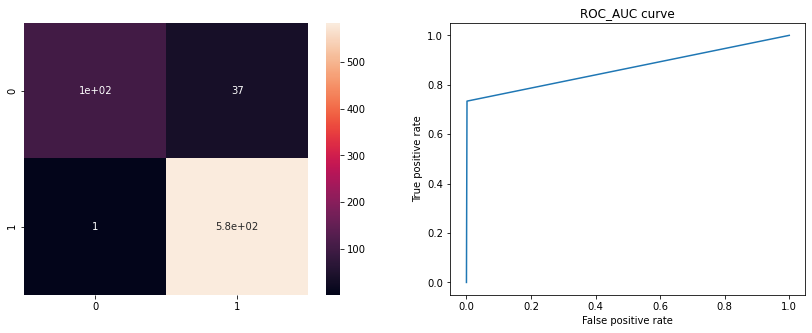

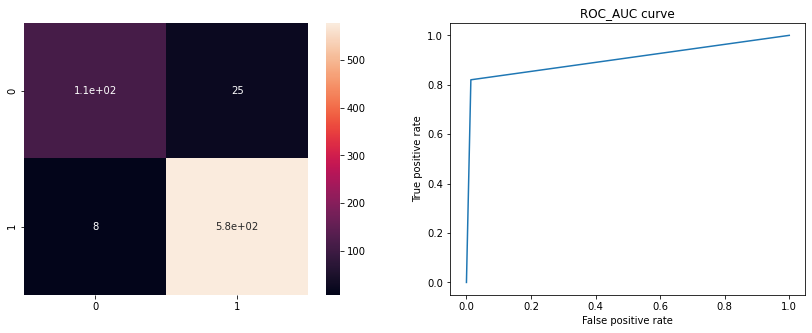

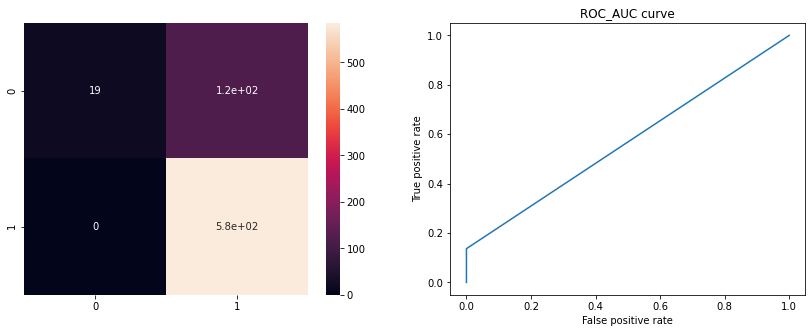

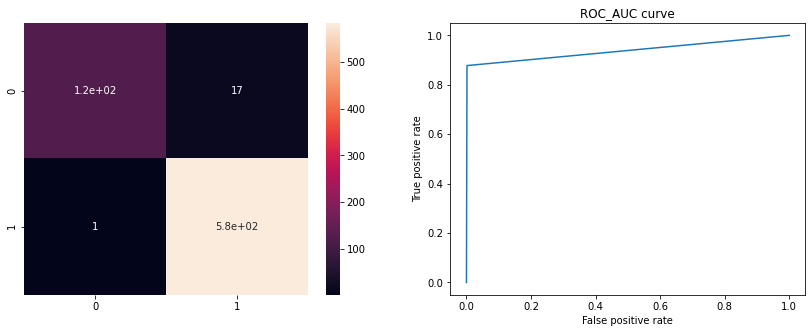

In [136]:
for i in models:
    print('############################',i,'######################')
    model_perf(i)

##### SVC is performing best among all algos giving very less false negative and along with less false positives

#### tuning parameteres for SVC 

In [146]:
from sklearn.model_selection import GridSearchCV
def grid_search(x,y,model,para_dict):
    grd=GridSearchCV(estimator=model,param_grid=para_dict,cv=5,scoring='f1')
    grd.fit(x,y)
    print('Best parameter',grd.best_params_)

In [153]:
grid_search(x,y,SVC(),{'kernel':['linear','poly','rbf']})

Best parameter {'kernel': 'linear'}


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       585
           1       0.99      0.94      0.97       139

    accuracy                           0.99       724
   macro avg       0.99      0.97      0.98       724
weighted avg       0.99      0.99      0.99       724

AxesSubplot(0.125,0.125;0.281818x0.755)
AUC_ROC score 0.9703683207280329


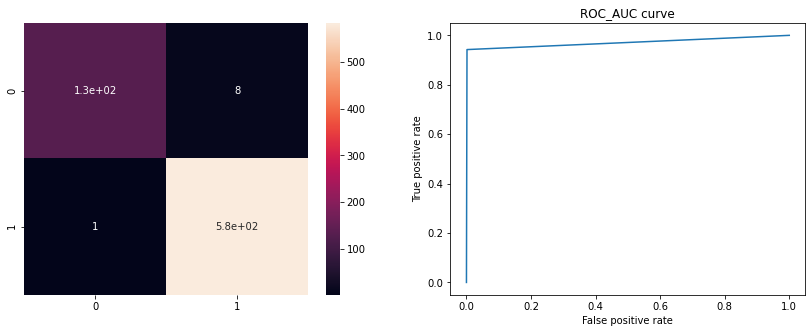

In [154]:
model_perf(SVC(kernel='linear'))

#### Score has been improved since we are getting only 1 false negative and 8 false positive. Hence finalizing the model

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       585
           1       0.99      0.94      0.97       139

    accuracy                           0.99       724
   macro avg       0.99      0.97      0.98       724
weighted avg       0.99      0.99      0.99       724

AxesSubplot(0.125,0.125;0.62x0.755)


['SPAM mail predictor.obj']

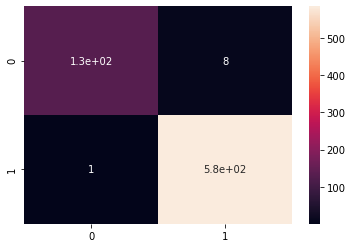

In [158]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
print(sb.heatmap(confusion_matrix(y_test,y_pred,labels=[1,0]),annot=True))

In [166]:
########checking for overfitting 
from sklearn.model_selection import cross_val_score
score=cross_val_score(SVC(kernel='linear'),x,y,cv=5,scoring='f1')
print(score,score.mean())

[0.96808511 0.95698925 0.96842105 0.96774194 0.96216216] 0.9646799007944837


###### Model is not overfitted

In [159]:
####ecprting the model
from sklearn.externals import joblib
joblib.dump(model,'SPAM mail predictor.obj')

['SPAM mail predictor.obj']